# Chapter07 連続型確率変数

In [126]:
# ライブラリーの準備
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.style.use('seaborn')
rcParams['font.family'] = 'IPAexgothic'
%precision 3
%matplotlib inline

In [127]:
from scipy import integrate
import warnings

# 積分に関するwarningを出力しないようにする
warnings.filterwarnings(
    'ignore', category=integrate.IntegrationWarning
)

## 7.1 1次元の連続型確率変数

### 7.1.1 1次元の連続型確率変数の定義

#### 確率密度関数（probability density function, PDF）、密度関数

- 離散型確率変数
  - とりうる値の（離散的な）集合と確率関数によって定義できた。
  - $f(x) = P(X = x)$

- 連続型確率変数
  - とりうる値は、区間$[a, b$で定義され、
  - 確率は、確率密度関数（密度関数）$f(x)$によって定義される。
- 密度関数による確率は、
  - 確率変数$X$が$x_0 \leq X \leq x_1$の区間に入る確率$P(x_0 \leq X \leq x_1)$で定義され、
  - 積分で計算される。

$$
P(x_0 \leq X \leq x_1) = \int_{x_0}^{x_1} f(x)dx
$$

- この積分は密度関数$f(x)$と$x$軸、2直線 $x=x_0, x=x_1$ に囲まれた領域の面積と解釈できる。
- つまり領域の面積が、確率$P(x_0 \leq X \leq x_1)$になる。

いかさまルーレットの作成

- ルーレットは大きい値ほど出やすい
- 定義域は、$(0 \leq x \leq 1)$
- 2をかけているのは確率の性質を満たすため

密度関数は以下とする。

$$
f(x) = 
\begin{cases}
\begin{align*}
2x ~~ &(0 \leq x \leq 1)
\\
0 ~~~~ &(otherwise)
\end{align*}
\end{cases}
$$

In [128]:
# とりうる値の区間の下限と上限をx_rangeに定義する
x_range = np.array([0, 1])

In [129]:
# x_rangeを定義域とする密度関数を作成する
def f(x):
    """いかさまルーレットの密度関数"""
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [130]:
# 定義域x_rangeと密度関数f(x)のセットが確率分布
# 確率分布によって、確率変数Xの振る舞いが決まる
# 確率変数Xは、定義域x_rangeと密度関数f(x)を要素にもつリストとして実装する
X = [x_range, f]

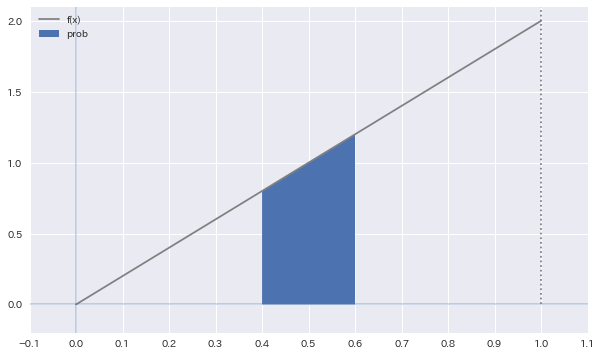

In [131]:
# 密度関数f(x)を図示する
# f(x)とx軸、2直線 x=0.4, x=0.6 に囲まれた領域を塗りつぶす
# いかさまルーレットが0.4から0.6の間の値をとる確率になる
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4~0.6のx座標
xs = np.linspace(0.4, 0.6, 100)

# xsの範囲でf(x)とx軸に囲まれた領域を塗りつぶす
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()
plt.show()

- 囲まれた領域の面積は、台形の面積の公式から求めることができる
- ここでは積分で求める

$$
P(x_0 \leq X \leq x_1) = \int_{x_0}^{x_1} f(x)dx
$$

&nbsp;

$$
f(x) = 
\begin{cases}
\begin{align*}
2x ~~ &(0 \leq x \leq 1)
\\
0 ~~~~ &(otherwise)
\end{align*}
\end{cases}
$$

$$
P(0.4 \leq X \leq 0.6) = \int_{0.4}^{0.6} 2x~dx
$$

In [132]:
# integrate.quad()関数を使って求める
# quad()関数の返り値は、積分値と推定誤差
# 第1引数が被積分関数、第2引数と第3引数が積分区間
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

#### 確率の性質

連続確率変数では、確率の性質として次の2つの式を満たす必要がある。

$$
\begin{align*}
f(x) &\geq 0
\\
\int_{-\infty}^{\infty} f(x)dx &= 1
\end{align*}
$$

In [133]:
# 確率の性質、1つ目の式の確認
# f(x)が常に0以上の値をとるという性質
# 関数の最小値を求める関数
# scipy.optimize.minimize_scalar()関数
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
# 関数の最小値はfunというインスタンス変数にある
res.fun

0

In [134]:
# 確率の性質、2つ目の式の確認
# f(x)を「-∞ から ∞」の区間で積分した結果が「1」
# 三角形も面積が「1」になることど同義
# 無限大は、np.infで表現できる
integrate.quad(f, -np.inf, np.inf)[0]

1.000

#### 累積分布関数（cumulative distribution function, CDF）、分布関数

確率変数$X$が$x$以下になるときの確率を返す関数を$F(x)$と表す

$$
F(x) = P(X \leq x) = \int_{-\infty}^{x} f(x)dx
$$

In [135]:
# いかさまルーレットの分布関数の実装
def F(x):
    """いかさまルーレットの分布関数"""
    return integrate.quad(f, -np.inf, x)[0]

- 分布関数でも確率を求めることができる
- ルーレットが0.4から0.6の間をとる確率

$$
P(0.4 \geq X \geq 0.6) = F(0.6) - F(0.4)
$$

In [136]:
F(0.6) - F(0.4)

0.200

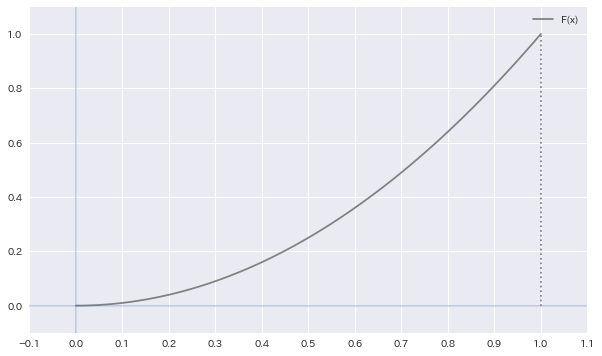

In [137]:
# いかさまルーレットの分布関数を図示する
# 単調増加関数（xが増えたときにyが減少することがない関数）になる
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label="F(x)", color="gray")
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=":", color="gray")

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

#### 確率変数の変換

- ルーレットの出た値に2をかけて3を足した$2X+3$を使い、これを$Y$とすると、
- $x = (y - 3)/2$
- $Y$もまた連続型の確率変数になっている。


確率変数$Y$の密度関数を$g(y)$とすると、

$$
g(y) = 
\begin{cases}
\begin{align*}
(y - 3)/2 ~~~ &(3 \leq y \leq 5)
\\
0 ~~~~~~~~~~~ &(otherwise)
\end{align*}
\end{cases}
$$

分布関数は、$G(y)$として、

$$
G(y) = P(Y \leq y) \int_{-\infty}^{y} g(y)dy
$$

In [138]:
# 確率変数の変換
# Y=2X+3
# X=(Y-3)/2
y_range = [3, 5]

def g(y):
    """Yの密度関数"""
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) /2
    else:
        return 0

def G(y):
    """Yの分布関数G(y)"""
    return integrate.quad(g, -np.inf, y)[0]

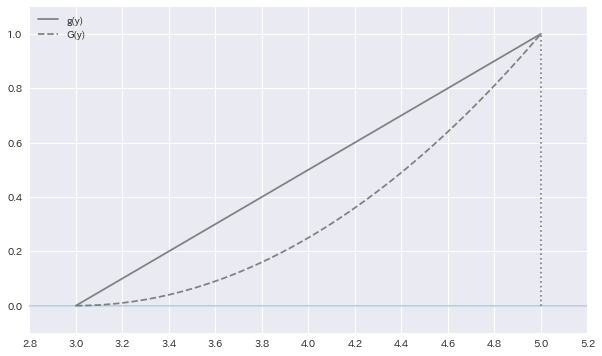

In [139]:
# Yの密度関数g(y)と分布関数G(y)を同時に図示する
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(
    ys, [g(y) for y in ys],
    label="g(y)", color="gray"
)
ax.plot(
    ys, [G(y) for y in ys],
    label="G(y)", ls="--", color="gray"
)
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyle=":", color="gray")

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

### 7.1.2 1次元の連続型確率分布の指標

#### 期待値

- 連続型確率変数$X$の平均は次の式で定義される。
- これは、確率変数$X$の期待値とも呼ばれる。

$$
\mu = E(X) = \int_{-\infty}^{\infty} x f(x)dx
$$

変換した確率変数について期待値を定義できる。

- 確率変数$X$を$2X + 3$と変換した確率変数$Y$の期待値は次の式で定義される。

$$
E(Y) = E(2X + 3) = \int_{-\infty}^{\infty} (2x + 3)f(x)dx
$$

より一般的に、確率変数$X$の変換$g(X)$の期待値を定義できる。

#### 連続型確率変数の期待値（平均）

$$
E\big(~g(X)~\big) = \int_{-\infty}^{\infty} g(x)f(x)dx
$$

- $g$が確率変数に対する変換の関数になる。

In [140]:
# 連続型確率変数の期待値
# 引数gが確率変数に対する関数になる
def E(X, g=lambda x: x):
    """連続型確率変数の期待値"""
    x_range, f = X
    def integrand(x):
        """被積分関数"""
        return g(x) * f(x)

    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [141]:
# いかさまルーレットの確率変数Xの期待値
E(X)

0.667

In [142]:
# 確率変数Y = 2X + 3の期待値
E(X, g=lambda x: 2*x+3)

4.333

In [143]:
# E(2X + 3) = 2E(X) + 3 の確認
2 * E(X) + 3

4.333

#### 分散

- 連続型確率変数$X$の分散は、次の式で定義される。
- $\mu$は、確率変数$X$の期待値$E(X)$。

$$
\sigma^2 = V(X) = \int_{-\infty}^{\infty} (x - \mu)^2 f(x)dx
$$

In [144]:
# いかさまルーレットの分散を計算する
mean = E(X)
def integrand(x):
    """被積分関数"""
    return (x - mean) ** 2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

変換した確率変数について分散を定義できる。

- 確率変数$X$を$2X + 3$と変換した確率変数$Y$の分散は次の式で定義される。
- $\mu = E(2X + 3)$

$$
V(Y) = V(2X + 3) = \int_{-\infty}^{\infty} ((2x + 3) - \mu)^2 f(x)dx
$$

より一般的に、確率変数$X$の変換$g(X)$の分散を定義できる。

#### 連続型確率変数の分散

$$
V\big(~g(X)~\big) = \int_{-\infty}^{\infty} \big( ~g(x) - E(g(X))~ \big)^2 f(x)dx
$$

- $g$が確率変数に対する変換の関数になる
- $E(g(X))$が期待値

In [145]:
# 連続型確率変数の分散
# 引数gが確率変数に対する関数になる
def V(X, g=lambda x: x):
    """連続型確率変数の分散"""
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        """被積分関数"""
        return (g(x) - mean) ** 2 * f(x)

    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [146]:
# いかさまルーレットの分散を計算する
# gを指定しなければ、確率変数Xの分散を計算する
V(X)

0.056

In [147]:
# 確率変数Y = 2X + 3 の分散
V(X, lambda x: 2*x + 3)

0.222

In [148]:
# V(2X + 3) = 2^2V(X)の確認
2**2 * V(X)

0.222

## 7.2 2次元の連続確率変数

### 7.2.1 2次元の連続型確率分布の定義

#### 同時確率密度関数

2次元の連続型確率変数$(X, Y)$は、

とりうる組み合わせ

$$
\{(x, y) ~|~ a \leq x \leq b; ~ c \leq y \leq d\}
$$

と、それを定義域にする関数

$$
f(x, y)
$$

によって定義される。

- この関数$f(x, y)$のことを**同時確率密度関数**という。


$x_0 \leq X \leq x_1$かつ$y_0 \leq Y \leq y_1$となる確率は次のように定義される。

$$
P(x_0 \leq X \leq x_1, ~ y_0 \leq Y \leq y_1) = 
\int_{x_0}^{x_1} \int_{y_0}^{y_1} f(x, y)dxdy
$$

#### 2次元の確率変数と使った具体例

- いかさまルーレットA、Bの2つを回す
  - Aの値を確率変数$Y$
  - Aの値とBの値を足したものを確率変数$X$
  - 2次元の確率変数$(X, Y)$

この確率変数$(X, Y)$のとりうる値は、

$$
\{ 0 \leq X \leq 2, ~ 0 \leq Y \leq 1 \}
$$

であり、同時確率密度関数は、

$$
f(x, y) = 
\begin{cases}
\begin{align*}
4y(x -y) ~~~ &(0 \leq y \leq 1 ~かつ~ 0 \leq x - y \leq 1)
\\
0 ~~~~~~~~~~ &(otherwise)
\end{align*}
\end{cases}
$$

となる。

2次元の連続型確率変数は確率の性質として、次の2つを満たす必要がある。

#### 確率の性質

$$
\begin{align*}
f(x, y) &\geq 0
\\
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} f(x, y) &= 1
\end{align*}
$$

In [149]:
# いかさまルーレットA, Bの実装

# XとYのとりうる値の定義
x_range = [0, 2]
y_range = [0, 1]

# 同時確率密度関数の定義
def f_xy(x, y):
    """いかさまルーレットA, Bの同時確率密度関数"""
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y)
    else:
        return 0

In [150]:
# 2次元確率変数(X, Y)の定義
# 確率変数(X, Y)のふるまいは、
# とりうる値x_range, y_rangeと
# 同時確率密度関数f_xyによって、定義される
# これらをリストとして、XYとする
XY = [x_range, y_range, f_xy]

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_3760/3018558980.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = ax.pcolor(pd)
/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_3760/3018558980.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(c, ax=ax)


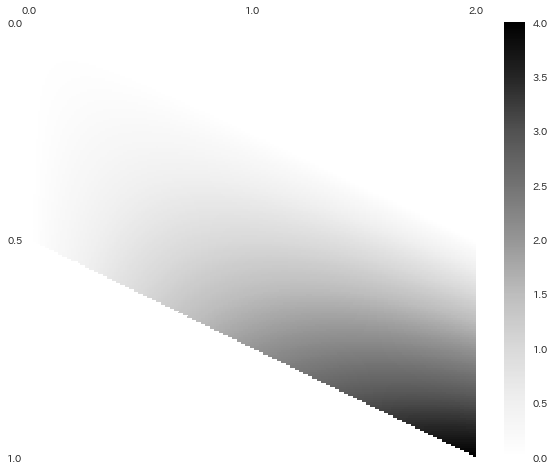

In [151]:
# いかさまルーレットA, Bの同時確率密度関数のヒートマップを図示する
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array(
    [[f_xy(x, y) for y in ys] for x in xs]
)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)

plt.show()

In [152]:
# 多重積分
# integrate.nquad()
# 第1引数: 被積分関数
# 第2引数: xの積分区間、yの積分区間
integrate.nquad(
    f_xy,
    [[-np.inf, np.inf], [-np.inf, np.inf]]
)[0]

1.000

#### 周辺確率密度関数

- 確率変数$(X, Y)$は、同時確率密度関数によって$X$と$Y$が同時に定義されていた。

- それぞれの確率変数にだけ興味がある場合、
  - 確率変数$X$の振る舞い（確率変数$X$の密度関数）を知りたい場合
  - 確率変数$Y$の振る舞い（確率変数$Y$の密度関数）を知りたい場合

このとき確率変数$X$の密度関数を$f_X(x)$とすると、

$$
f_X(x) = \int_{-\infty}^{\infty} f(x, y)dy
$$

が成り立つ。

このように求められた$f_X(x)$のことを、$X$の**周辺確率密度関数**、または**周辺密度関数**という。

In [153]:
# functools.partial()
# 引数の一部を固定した新しい関数を作ることができる
from functools import partial

def f_X(x):
    """
    関数f_xyの引数x, yのうちxが固定され、引数yのみになった関数
    Xの周辺密度関数
    """
    return integrate.quad(
        partial(f_xy, x),
        -np.inf, np.inf
    )[0]

def f_Y(y):
    """
    関数f_xyの引数x, yのうちyが固定され、引数xのみになった関数
    Yの周辺密度関数
    """
    return integrate.quad(
        partial(f_xy, y=y),
        -np.inf, np.inf
    )[0]

In [154]:
# 確率変数X, Yの周辺密度関数から
# それぞれの振る舞いを求める
X = [x_range, f_X]
Y = [y_range, f_Y]

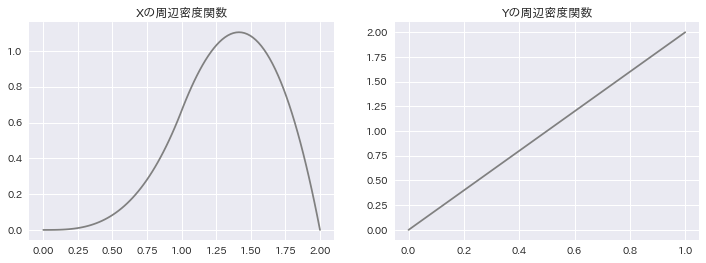

In [155]:
# 確率変数X, Yの周辺密度関数を図示する
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')

ax1.set_title('Xの周辺密度関数')
ax2.set_title('Yの周辺密度関数')

plt.show()

### 7.2.2 2次元の連続型確率変数の指標

#### 期待値

- 1次元の連続型変数の期待値とほぼ同じ
- 確率変数$X$の期待値であれば、$x$と密度関数$f(x, y)$の積を$x$と$y$について積分することで求めることができる。

$$
\mu_X = E(X) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} xf(x, y)dxdy
$$

In [156]:
# いかさまルーレットA、Bの2つを回す
# Aの値とBの値を足したものを確率変数Xの期待値
def integrand(x, y):
    return x * f_xy(x, y)

integrate.nquad(
    integrand,
    [[-np.inf, np.inf], [-np.inf, np.inf]]
)[0]

1.333

一般に$X, Y$の関数$g(X, Y)$の期待値を定義でき、次のようになる。

$$
E\big( g(X, Y) \big) = 
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} g(x, y)f(x, y)dxdy
$$

In [157]:
# 期待値の実装
# いかさまルーレットA、Bの2つを回す
# - Aの値を確率変数Y
# - Aの値とBの値を足したものを確率変数X
# - 2次元の確率変数(X, Y)
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x, y):
        """確率変数Xの期待値"""
        return g(x, y) * f_xy(x, y)

    return integrate.nquad(
        integrand,
        [[-np.inf, np.inf], [-np.inf, np.inf]]
    )[0]

In [158]:
# 確率変数Xの期待値
mean_X = E(XY, lambda x, y:x)
mean_X

1.333

In [159]:
# 確率変数Yの期待値
mean_Y = E(XY, lambda x, y: y)
mean_Y

0.667

In [160]:
# 期待値の線形性
# E(2X + 3Y) = 2E(X) + 3E(Y)
a, b = 2, 3

In [161]:
# E(2X + 3Y)
E(XY, lambda x, y: a*x + b*y)

4.667

In [163]:
# 2E(X) + 3E(Y)
a * mean_X + b * mean_Y

4.667

#### 分散

- 1次元のときとほぼ同じ
- 確率変数$X$の分散は次の式で求めることができる

$$
\sigma_X^2 = V(X) = 
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} (x - \mu_X)^2 f(x, y)dxdy
$$

In [164]:
# いかさまルーレットA、Bの2つを回す
# Aの値とBの値を足したものを確率変数Xの分散
def integrand(x, y):
    """確率変数Xの分散"""
    return (x - mean_X)**2 * f_xy(x, y)

integrate.nquad(
    integrand,
    [[-np.inf, np.inf], [-np.inf, np.inf]]
)[0]

0.111

一般に$X, Y$の関数$g(X, Y)$の分散を定義でき、次のようになる。

$$
V\big( g(X, Y) \big) =
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} 
\big(~ g(x, y) - E(g(X, Y)) ~\big)^2 f(x, y)dxdy
$$

- $E( g(X, Y) )$: 期待値

In [165]:
# 2次元の連続型確率変数の分散
def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x, y):
        return (g(x, y) - mean)**2 * f_xy(x, y)

    return integrate.nquad(
        integrand,
        [[-np.inf, np.inf], [-np.inf, np.inf]]
    )[0]

In [166]:
# 確率変数Xの分散
var_X = V(XY, lambda x, y: x)
var_X

0.111

In [168]:
# 確率変数Yの分散
var_Y = V(XY, lambda x, y: y)
var_Y

0.056

#### 共分散

$$
\sigma_{XY} = Cov(X, Y) =
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
(x - \mu_X)(y - \mu_Y)f(x, y)dxdy
$$

In [169]:
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    def integrand(x, y):
        return (x - mean_X) * (y - mean_Y) * f_xy(x, y)

    return integrate.nquad(
        integrand,
        [[-np.inf, np.inf], [-np.inf, np.inf]]
    )[0]

In [171]:
cov_xy = Cov(XY)
cov_xy

0.056

In [172]:
# V(2X + 3Y) = 4V(X) + 9V(Y) + 12Cov(X, Y)
V(XY, lambda x, y: a*x + b*y) 

1.611

In [173]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

1.611

#### 相関係数

$$
\rho_{XY} = \dfrac{\sigma_{XY}}{\sigma_X \sigma_Y}
$$

In [176]:
cov_xy / np.sqrt(var_X * var_Y)

0.707